In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import os
os.chdir('C:/Users/Yashar/Desktop/Data Science Bootcamp/Python programming/Week 10')
df = pd.read_csv('College.csv')

# Data Exploration

In [3]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df['Private'] = np.where(df['Private'] == 'Yes', 1, 0)

In [5]:
p = pd.DataFrame(df['Private'])
df.drop(['Private'],axis = 1,inplace = True)
df = pd.concat([df,p],axis=1)

In [6]:
df.head()

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
Private        777 non-null int32
dtypes: float64(1), int32(1), int64(16), object(1)
memory usage: 112.4+ KB


In [8]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

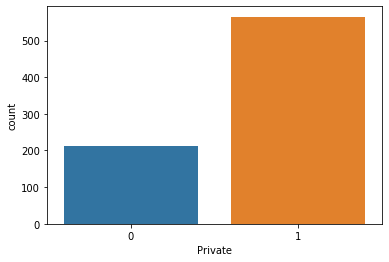

In [9]:
sns.countplot('Private',data=df)

# PCA

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [14]:
explained_variance

array([0.32136325, 0.26074808])

In [15]:
X_train

array([[ 0.1733138 ,  3.53033116],
       [ 1.97637145, -2.51628697],
       [ 1.34807577,  2.79010583],
       ...,
       [-1.64625275, -0.11603417],
       [ 1.23650956, -1.2388261 ],
       [-2.212269  ,  4.9103641 ]])

In [16]:
X_test

array([[ 0.02478062, -1.96852663],
       [ 3.44055508, -2.72381774],
       [-0.09455418, -1.05722316],
       [-2.14317255, -0.37303996],
       [ 0.6848229 , -0.25405781],
       [ 1.73427799,  1.78481598],
       [ 0.13088171, -1.47967363],
       [-0.62266626, -1.47992419],
       [-0.80889353,  0.49179496],
       [ 1.79457047,  0.04485208],
       [ 1.02903338, -1.57490212],
       [-2.26658942,  1.0549515 ],
       [ 1.64312034, -1.65716819],
       [ 7.79297363, -2.4536811 ],
       [-2.29206379,  0.56966662],
       [ 1.44703281,  3.12845879],
       [-0.74892701,  4.38317906],
       [-3.00381424, -0.03005546],
       [ 0.29944103,  2.50137429],
       [-1.92665348, -1.11769851],
       [-2.77265284, -0.53062882],
       [ 2.2873963 , -2.0303436 ],
       [-2.62098986,  1.37510995],
       [ 1.70499506,  3.40649924],
       [ 1.32589039,  4.01062096],
       [-1.41624018,  2.45035435],
       [-1.38270907,  0.12783871],
       [ 6.28897663, -2.68585184],
       [ 2.10690137,

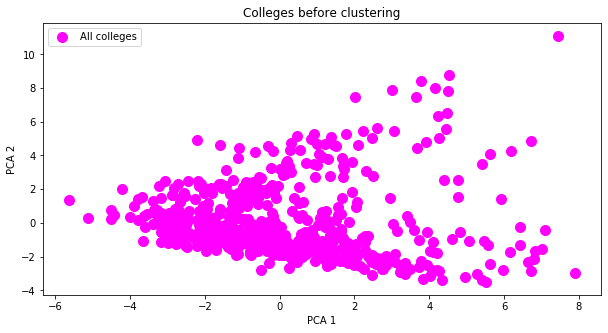

In [17]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X_train[:,0],X_train[:,1],s=100,c='magenta',label='All colleges')
plt.title('Colleges before clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# K-Means

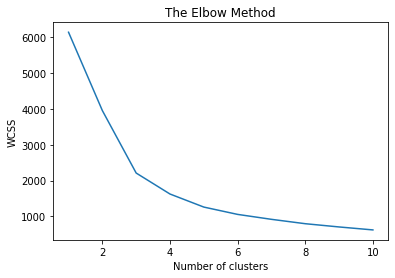

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

In [20]:
actual_class=y_train
predicted_class=y_kmeans

In [21]:
confusion_matrix(actual_class,predicted_class)

array([[120,  51],
       [287, 163]], dtype=int64)

In [22]:
print("Training set accuracy is : {}".format(sum((actual_class == predicted_class)*1)/len(actual_class)))

Training set accuracy is : 0.4557165861513688


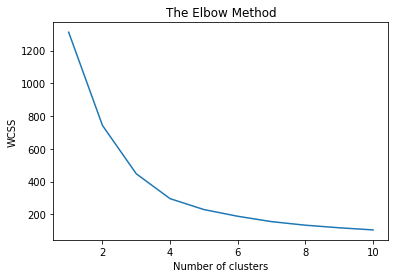

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_test)

In [25]:
actual_class=y_test
predicted_class=y_kmeans

In [26]:
confusion_matrix(actual_class,predicted_class)

array([[35,  6],
       [63, 52]], dtype=int64)

In [27]:
print("Test set accuracy is : {}".format(sum((actual_class == predicted_class)*1)/len(actual_class)))

Test set accuracy is : 0.5576923076923077


# Logistic Regression

In [28]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [30]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[ 33,   8],
       [  4, 111]], dtype=int64)

In [32]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

In [33]:
accuracy_score(y_test, y_pred)

0.9230769230769231

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


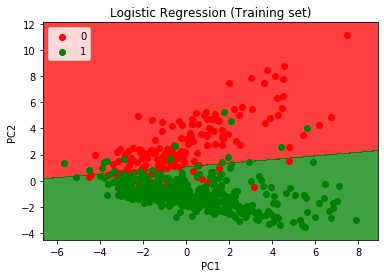

In [34]:
# Visualising the Training set results

X_set, y_set = X_train, y_train
#minimum və maximum dəyərlərin köməyi ilə x1 və x2 (PCA1 və (PCA2) oxlarının aralığı təyin olunur)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


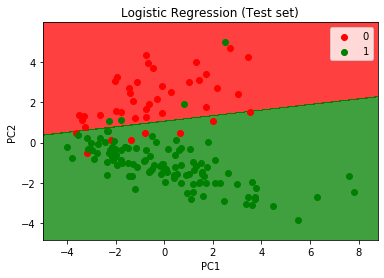

In [35]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

To sum up, K-means algorithm is not a good performer in this case, especially when we used PCA.
In training set there's 45% accuracy, however in test set there's 55% accuracy, which indicates a huge underfitting problem.

Besides K-means, I used Logistic Regression by assuming what would happen if it was classification problem.